In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv('Final.csv')
data.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [3]:
datanew = data.loc[data['Name_calc'] == 'Triglycerides (TG)']
datanew = datanew.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'a1c_Res', 'BP_res', 'A1C_RF','BP_RF','Lip_RF','Alb_RF','Total_RF'], axis=1)
print(datanew)

        PerformedDate  Lipids_Res
2410645    2017-10-19       205.0
2410646    2016-10-14       187.0
2410647    2014-03-18       156.0
2410648    2014-01-17       198.0
2410649    2013-07-13        54.0
...               ...         ...
3344181    2018-06-05       153.0
3344182    2019-07-17        26.0
3344183           NaN       424.0
3344184    2019-07-23       109.0
3344185    2019-10-17        76.0

[933541 rows x 2 columns]


In [4]:
datanew['PerformedDate'] = pd.to_datetime(datanew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datanew

In [5]:
filt_df = indexedDataset.loc[:, indexedDataset.columns != 'PerformedDate']
low = .25
high = .75

quant_df = filt_df.quantile([low, high])
print(quant_df)
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
filt_df = pd.concat([indexedDataset.loc[:,'PerformedDate'], filt_df], axis=1)
filt_df.dropna(inplace=True)
print(filt_df)

      Lipids_Res
0.25        91.0
0.75       213.0
        PerformedDate  Lipids_Res
2410645    2017-10-19       205.0
2410646    2016-10-14       187.0
2410647    2014-03-18       156.0
2410648    2014-01-17       198.0
2410656    2006-10-07       198.0
...               ...         ...
3344176    2017-03-17       165.0
3344177    2018-09-05       126.0
3344178    2015-07-13        99.0
3344181    2018-06-05       153.0
3344184    2019-07-23       109.0

[427868 rows x 2 columns]


In [6]:
indexedDataset = filt_df.set_index(['PerformedDate'])

In [7]:
from datetime import datetime

In [8]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               Lipids_Res
PerformedDate            
2017-10-19          205.0
2016-10-14          187.0
2014-03-18          156.0
2014-01-17          198.0
2006-10-07          198.0
...                   ...
2017-03-17          165.0
2018-09-05          126.0
2015-07-13           99.0
2018-06-05          153.0
2019-07-23          109.0

[427868 rows x 1 columns]


In [9]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               Lipids_Res
PerformedDate            
1995-09-19          104.0
1995-09-25           94.0
1995-10-04          159.0
1995-10-10          126.0
1995-10-20          159.0
...                   ...
2019-12-31          103.0
2019-12-31          206.0
2019-12-31          106.0
2019-12-31          156.0
2019-12-31          123.0

[427868 rows x 1 columns]


               Lipids_Res
PerformedDate            
2018-03-01          104.0
2018-03-01          119.0
2018-03-01          105.0
2018-03-01          123.0
2018-03-01          151.0
...                   ...
2018-04-30          133.0
2018-04-30          115.0
2018-04-30          197.0
2018-04-30          148.0
2018-04-30          109.0

[7490 rows x 1 columns]


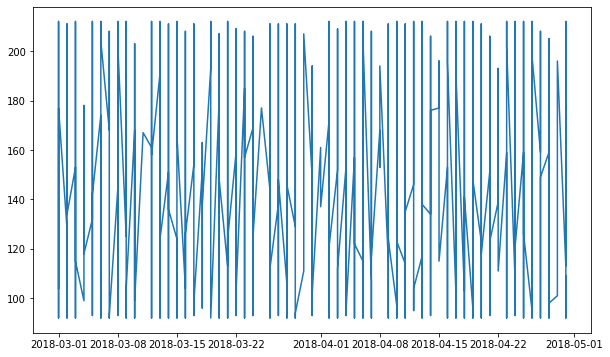

In [10]:
sub = indexedDataset['2018-03':'2018-04']
print(sub)
plt.plot(sub)

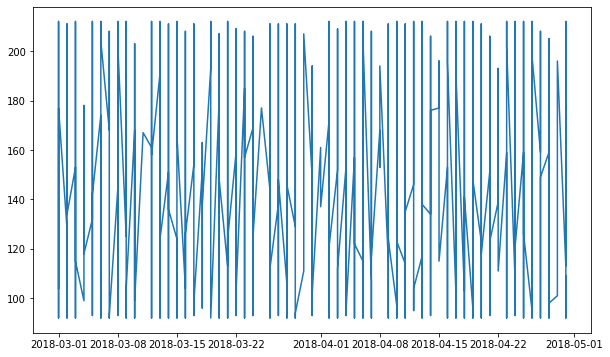

In [11]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['Lipids_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [12]:
indexedDataset = new2
print(indexedDataset)

               Lipids_Res
PerformedDate            
2018-03-01          104.0
2018-03-01          119.0
2018-03-01          105.0
2018-03-01          123.0
2018-03-01          151.0
...                   ...
2018-04-30          133.0
2018-04-30          115.0
2018-04-30          197.0
2018-04-30          148.0
2018-04-30          109.0

[7490 rows x 1 columns]


In [13]:
print(indexedDataset.max())
print(indexedDataset.min())

Lipids_Res    212.0
dtype: float64
Lipids_Res    92.0
dtype: float64


In [14]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

               Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30     149.583333
2018-04-30     147.666667
2018-04-30     154.416667
2018-04-30     150.750000
2018-04-30     142.500000

[7490 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30      37.012181
2018-04-30      38.241656
2018-04-30      39.278628
2018-04-30      37.463012
2018-04-30      34.492423

[7490 rows x 1 columns]


In [15]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

               Lipids_Res
PerformedDate            
2018-03-01       4.644391
2018-03-01       4.779123
2018-03-01       4.653960
2018-03-01       4.812184
2018-03-01       5.017280
...                   ...
2018-04-30       4.890349
2018-04-30       4.744932
2018-04-30       5.283204
2018-04-30       4.997212
2018-04-30       4.691348

[7490 rows x 1 columns]


In [16]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

               Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30       4.979399
2018-04-30       4.964205
2018-04-30       5.008340
2018-04-30       4.986649
2018-04-30       4.932800

[7490 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
2018-03-01            NaN
...                   ...
2018-04-30       0.250560
2018-04-30       0.259382
2018-04-30       0.265278
2018-04-30       0.253430
2018-04-30       0.240412

[7490 rows x 1 columns]


In [17]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Lipids_Res
PerformedDate,
2018-03-01,-0.114026
2018-03-01,-0.035789
2018-03-01,-0.312838
2018-03-01,-0.081470
2018-03-01,-0.167810
2018-03-01,-0.009456
2018-03-01,0.259544
2018-03-01,0.220574
2018-03-01,0.050834


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Lipids_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

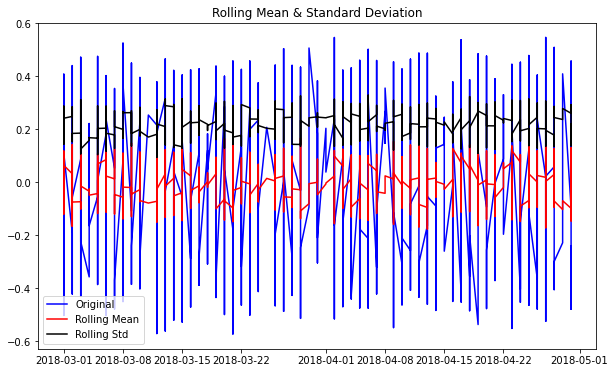

Results of Dickey-Fuller Test:
Test Statistic                  -23.006073
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    7444.000000
Critical Value (1%)              -3.431229
Critical Value (5%)              -2.861928
Critical Value (10%)             -2.566977
dtype: float64


In [19]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

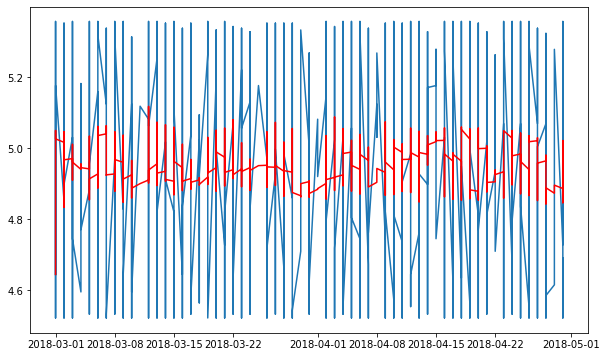

In [20]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

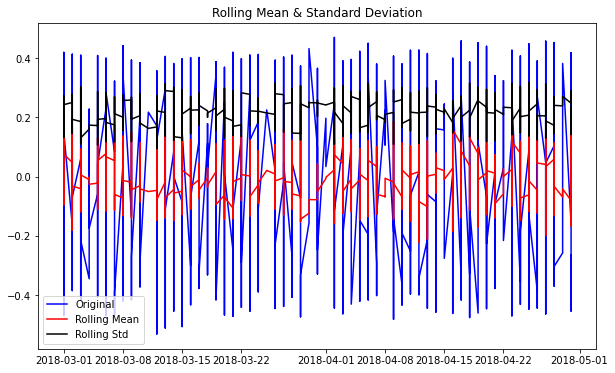

Results of Dickey-Fuller Test:
Test Statistic                  -19.514995
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    7456.000000
Critical Value (1%)              -3.431227
Critical Value (5%)              -2.861928
Critical Value (10%)             -2.566976
dtype: float64


In [21]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

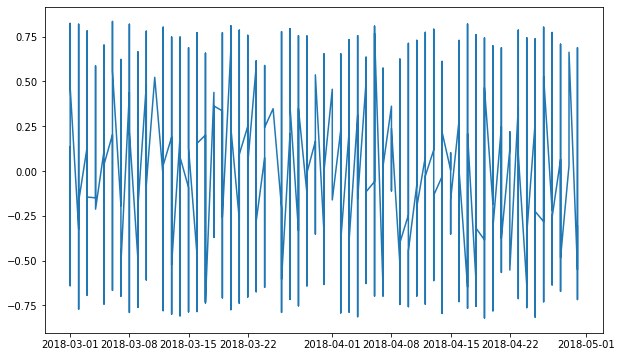

In [22]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

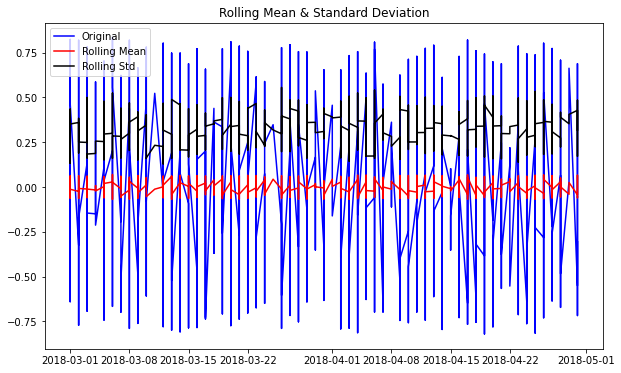

Results of Dickey-Fuller Test:
Test Statistic                  -25.005166
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    7453.000000
Critical Value (1%)              -3.431228
Critical Value (5%)              -2.861928
Critical Value (10%)             -2.566976
dtype: float64


In [23]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

<ipython-input-36-f0c1f802b178>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-36-f0c1f802b178>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


               Lipids_Res
PerformedDate            
2018-03-01            0.0
2018-03-01            0.0
2018-03-01            0.0
2018-03-01            0.0
2018-03-01            0.0
...                   ...
2018-04-30            0.0
2018-04-30            0.0
2018-04-30            0.0
2018-04-30            0.0
2018-04-30            0.0

[7490 rows x 1 columns]


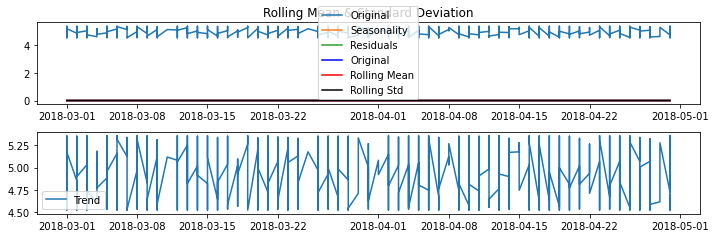

Results of Dickey-Fuller Test:
Test Statistic                         NaN
p-value                                NaN
#Lags Used                        0.000000
Number of Observations Used    7489.000000
Critical Value (1%)              -3.431223
Critical Value (5%)              -2.861926
Critical Value (10%)             -2.566975
dtype: float64


c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [36]:
import statsmodels as sm
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

decomposition = seasonal_decompose(indexedDataset_logScale, period = 1 ) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
s = pd.DataFrame(decomposedLogData)
df = s.rename(columns={"resid": "Lipids_Res"})
print(df)
test_stationarity(df)

In [24]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


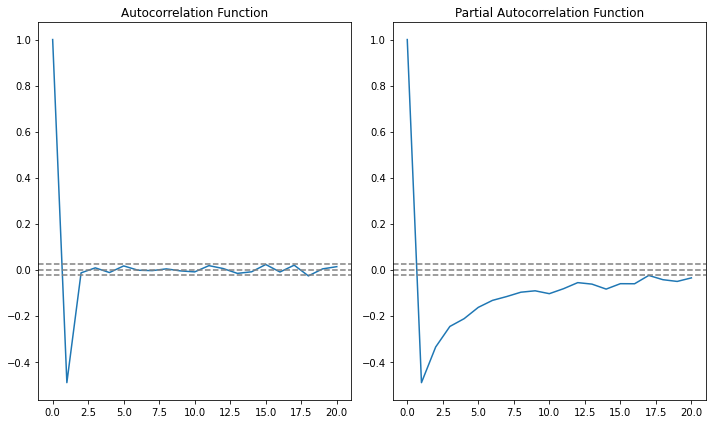

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

Plotting AR model


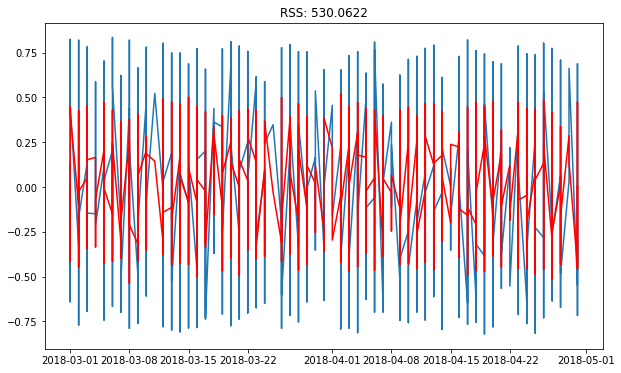

In [26]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


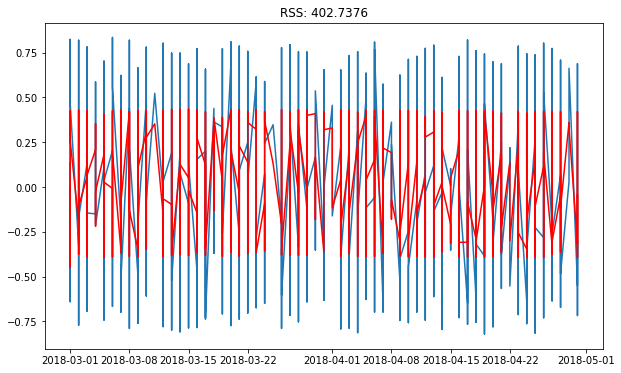

In [27]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release

Text(0.5, 1.0, 'RSS: 402.7101')

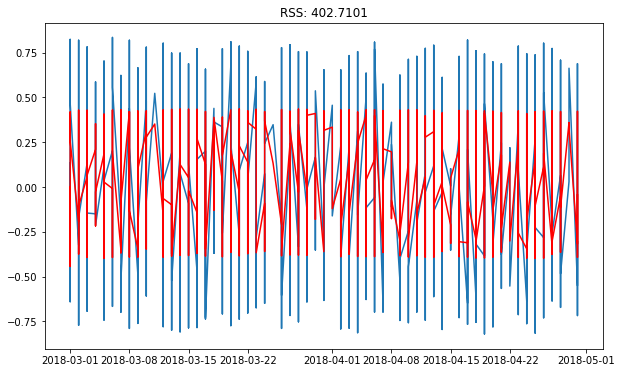

In [28]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))

In [29]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-03-01   -0.000002
2018-03-01   -0.065859
2018-03-01    0.037001
2018-03-01   -0.087709
2018-03-01   -0.230322
dtype: float64


In [30]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-03-01   -0.000002
2018-03-01   -0.065862
2018-03-01   -0.028861
2018-03-01   -0.116569
2018-03-01   -0.346892
dtype: float64


In [31]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-03-01    4.644389
2018-03-01    4.578529
2018-03-01    4.615530
2018-03-01    4.527821
2018-03-01    4.297499
dtype: float64

In [32]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
print(predictions_ARIMA)

PerformedDate
2018-03-01    103.999759
2018-03-01     97.371073
2018-03-01    101.041367
2018-03-01     92.556698
2018-03-01     73.515724
                 ...    
2018-04-30      0.000010
2018-04-30      0.000010
2018-04-30      0.000013
2018-04-30      0.000009
2018-04-30      0.000009
Length: 1208035, dtype: float64


In [33]:
j = (predictions_ARIMA-indexedDataset['Lipids_Res'])**2
#print(j)
k = len(indexedDataset['Lipids_Res'])
#print(k)
u = sum(j/k)
#print(u)
rmse = np.sqrt(u)

In [34]:
print(rmse)

24714.12913401593


Text(0.5, 1.0, 'RMSE: 24714.1291')

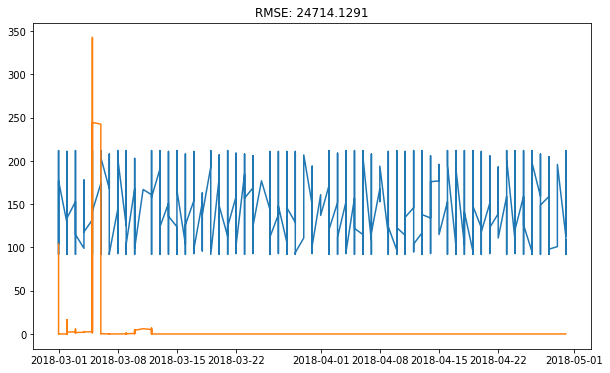

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['Lipids_Res'])**2)/len(indexedDataset['Lipids_Res'])))